In [1]:
import os
import glob
import netCDF4
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import gridspec
import cartopy.crs as ccrs
import cartopy.feature
import seaborn as sns

import wrf
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import matplotlib.ticker as mticker
import matplotlib.colors

In [2]:
###############################################################
# CHARGE ATMOS variables
###############################################################

#Parameters
folder_mod = '/capstor/scratch/cscs/gsergi/OUTPUT_PGW_20220315/ANT_20220315_'
domain = 'd01'
acc_t = 1440 #minutes
ini_date_idx=0
#end_date_idx=0

###load data###
outhist_files = '/outhist/outhist_'+domain+'_*'# Load netcdf

#hist
print('Charging Ant hist...')
wrflist_oh = []
proj = 'hist'
print('Total: ' + str(np.size(glob.glob(folder_mod+proj+outhist_files))))
for i,ncdf_oh in enumerate(np.sort(glob.glob(folder_mod+proj+outhist_files))):
        print(i, end="\r")
        wrflist_oh.append(netCDF4.Dataset(ncdf_oh))
    
# Extract the pressure, geopotential height, and wind variables
Ppertubation_ant_hist = wrf.getvar(wrflist_oh, 'P', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
PB_ant_hist = wrf.getvar(wrflist_oh, 'PB', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
P_ant_hist = (Ppertubation_ant_hist + PB_ant_hist)

PHperturbation_ant_hist = wrf.getvar(wrflist_oh, 'PH', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
PHB_ant_hist = wrf.getvar(wrflist_oh, 'PHB', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
Z_ant_hist = (PHperturbation_ant_hist + PHB_ant_hist)/9.8
Z_ant_hist_unstg = wrf.destagger(Z_ant_hist, stagger_dim=1)

PT_ant_hist = wrf.getvar(wrflist_oh, 'T', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:] + 300
T_ant_hist = PT_ant_hist * (P_ant_hist/100000)**0.286

U_ant_hist = wrf.getvar(wrflist_oh, 'U', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
V_ant_hist = wrf.getvar(wrflist_oh, 'V', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
#Wind_ant_hist = np.squrt(U_ant_hist**2 + V_ant_hist**2)

# Get plt variables
qvapor_ant_hist = wrf.getvar(wrflist_oh, 'QVAPOR', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qcloud_ant_hist = wrf.getvar(wrflist_oh, 'QCLOUD', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qice_ant_hist = wrf.getvar(wrflist_oh, 'QICE', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qrain_ant_hist = wrf.getvar(wrflist_oh, 'QRAIN', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qsnow_ant_hist = wrf.getvar(wrflist_oh, 'QSNOW', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qice_ant_hist = wrf.getvar(wrflist_oh, 'QICE', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qvapor_50m_hist = qvapor_ant_hist[:,0,:,:]
qcloud_50m_hist = qcloud_ant_hist[:,0,:,:]
qcloud_200m_hist = qcloud_ant_hist[:,9,:,:]
qrain_50m_hist = qrain_ant_hist[:,0,:,:]
qsnow_50m_hist = qsnow_ant_hist[:,0,:,:]
qice_50m_hist = qice_ant_hist[:,0,:,:]

qbs_ant_hist = wrf.getvar(wrflist_oh, 'bs_qi', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qbs_50m_hist = qbs_ant_hist[:, 0, :, :]

pw_ant_hist = wrf.pw(P_ant_hist, T_ant_hist, qvapor_ant_hist, Z_ant_hist, meta=True)
lwp_ant_hist = wrf.pw(P_ant_hist, T_ant_hist, qcloud_ant_hist, Z_ant_hist, meta=True)
iwp_ant_hist = wrf.pw(P_ant_hist, T_ant_hist, qice_ant_hist, Z_ant_hist, meta=True)

#past
print('Charging Ant past...')
wrflist_oh = []
proj = 'past_new'
print('Total: ' + str(np.size(glob.glob(folder_mod+proj+outhist_files))))
for i,ncdf_oh in enumerate(np.sort(glob.glob(folder_mod+proj+outhist_files))):
        print(i, end="\r")
        wrflist_oh.append(netCDF4.Dataset(ncdf_oh))
    
# Extract the pressure, geopotential height, and wind variables
Ppertubation_ant_past = wrf.getvar(wrflist_oh, 'P', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
PB_ant_past = wrf.getvar(wrflist_oh, 'PB', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
P_ant_past = (Ppertubation_ant_past + PB_ant_past)

PHperturbation_ant_past= wrf.getvar(wrflist_oh, 'PH', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
PHB_ant_past = wrf.getvar(wrflist_oh, 'PHB', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
Z_ant_past = (PHperturbation_ant_past + PHB_ant_past)/9.8
Z_ant_past_unstg = wrf.destagger(Z_ant_past, stagger_dim=1)

PT_ant_past = wrf.getvar(wrflist_oh, 'T', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:] + 300
T_ant_past = PT_ant_past * (P_ant_past/100000)**0.286

U_ant_past = wrf.getvar(wrflist_oh, 'U', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
V_ant_past = wrf.getvar(wrflist_oh, 'V', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
#Wind_ant_past = np.squrt(U_ant_past**2 + V_ant_past**2)

# Get plt variables
qvapor_ant_past = wrf.getvar(wrflist_oh, 'QVAPOR', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qcloud_ant_past = wrf.getvar(wrflist_oh, 'QCLOUD', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qice_ant_past = wrf.getvar(wrflist_oh, 'QICE', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qrain_ant_past = wrf.getvar(wrflist_oh, 'QRAIN', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qsnow_ant_past = wrf.getvar(wrflist_oh, 'QSNOW', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qice_ant_past = wrf.getvar(wrflist_oh, 'QICE', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qvapor_50m_past = qvapor_ant_past[:,0,:,:]
qcloud_50m_past = qcloud_ant_past[:,0,:,:]
qcloud_200m_past = qcloud_ant_past[:,9,:,:]
qrain_50m_past = qrain_ant_past[:,0,:,:]
qsnow_50m_past = qsnow_ant_past[:,0,:,:]
qice_50m_past = qice_ant_past[:,0,:,:]

qbs_ant_past = wrf.getvar(wrflist_oh, 'bs_qi', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qbs_50m_past = qbs_ant_past[:, 0, :, :]

pw_ant_past = wrf.pw(P_ant_past, T_ant_past, qvapor_ant_past, Z_ant_past, meta=True)
lwp_ant_past = wrf.pw(P_ant_past, T_ant_past, qcloud_ant_past, Z_ant_past, meta=True)
iwp_ant_past = wrf.pw(P_ant_past, T_ant_past, qice_ant_past, Z_ant_past, meta=True)

######################
# ANT COORDINATES
# Get surface fix variables
height = wrf.getvar(wrflist_oh, 'HGT', timeidx=0, method="cat")[:,:]
# Get dimension
lats, lons = wrf.latlon_coords(qvapor_ant_past)
times = wrf.extract_times(wrflist_oh, timeidx=wrf.ALL_TIMES)


###############################################################
# CHARGE ENERGY variables
###############################################################

#Parameters
folder_mod = '/capstor/scratch/cscs/gsergi/OUTPUT_PGW_20220315/ANT_20220315_'
domain = 'd01'
acc_t = 1440 #minutes
ini_date_idx=0
tini_ix = 39
#end_date_idx=0

###load data###
snpack_files = '/SMB/SMB_'+domain+'_*'# Load netcdf
outhist_files = '/outhist/outhist_'+domain+'_*'# Load netcdf

################
#hist
print('Charging Ant hist...')
wrflist_smb = []
wrflist_out = []
proj = 'hist'
print('Total: ' + str(np.size(glob.glob(folder_mod+proj+snpack_files))))
for i,ncdf_smb in enumerate(np.sort(glob.glob(folder_mod+proj+snpack_files))):
        print(i, end="\r")
        wrflist_smb.append(netCDF4.Dataset(ncdf_smb))

print('Total: ' + str(np.size(glob.glob(folder_mod+proj+outhist_files))))
for i,ncdf_out in enumerate(np.sort(glob.glob(folder_mod+proj+outhist_files))):
        print(i, end="\r")
        wrflist_out.append(netCDF4.Dataset(ncdf_out))
    
# Get surface variables
sigma = 5.670374419E-8
TSK = wrf.getvar(wrflist_out, 'TSK', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
E_LWINC_hist = wrf.getvar(wrflist_out, 'GLW', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
E_LWOUT_hist = -0.98*sigma*TSK**4
E_LWNET_hist = E_LWINC_hist + E_LWOUT_hist
E_SWINC_hist = wrf.getvar(wrflist_out, 'SWDOWN', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
E_SWNET_hist = wrf.getvar(wrflist_out, 'GSW', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
E_SWOUT_hist = E_SWNET_hist - E_SWINC_hist
E_SENSH_hist = wrf.getvar(wrflist_smb, 'HFX', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
E_LATEH_hist = wrf.getvar(wrflist_smb, 'LH', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
E_TOTAL_hist = E_LWINC_hist + E_LWOUT_hist + E_SWINC_hist + E_SWOUT_hist - E_SENSH_hist - E_LATEH_hist


################
#past
print('Charging Ant past...')
wrflist_smb = []
wrflist_out = []
proj = 'past_new'
print('Total: ' + str(np.size(glob.glob(folder_mod+proj+snpack_files))))
for i,ncdf_smb in enumerate(np.sort(glob.glob(folder_mod+proj+snpack_files))):
        print(i, end="\r")
        wrflist_smb.append(netCDF4.Dataset(ncdf_smb))

print('Total: ' + str(np.size(glob.glob(folder_mod+proj+outhist_files))))
for i,ncdf_out in enumerate(np.sort(glob.glob(folder_mod+proj+outhist_files))):
        print(i, end="\r")
        wrflist_out.append(netCDF4.Dataset(ncdf_out))
    
# Get surface variables
sigma = 5.670374419E-8
TSK = wrf.getvar(wrflist_out, 'TSK', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
E_LWINC_past = wrf.getvar(wrflist_out, 'GLW', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
E_LWOUT_past = -0.98*sigma*TSK**4
E_LWNET_past = E_LWINC_past + E_LWOUT_past
E_SWINC_past = wrf.getvar(wrflist_out, 'SWDOWN', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
E_SWNET_past = wrf.getvar(wrflist_out, 'GSW', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
E_SWOUT_past = E_SWNET_past - E_SWINC_past
E_SENSH_past = wrf.getvar(wrflist_smb, 'HFX', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
E_LATEH_past = wrf.getvar(wrflist_smb, 'LH', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
E_TOTAL_past = E_LWINC_past + E_LWOUT_past + E_SWINC_past + E_SWOUT_past - E_SENSH_past - E_LATEH_past


######################
# ANT COORDINATES
# Get surface fix variables
height = wrf.getvar(wrflist_smb, 'HGT', timeidx=0, method="cat")[:,:]
# Get dimension
lats, lons = wrf.latlon_coords(E_SENSH_hist)
times = wrf.extract_times(wrflist_smb, timeidx=wrf.ALL_TIMES)

Charging Ant hist...
Total: 59
Charging Ant past...
Total: 59
Charging Ant hist...
Total: 59
Total: 59
Charging Ant past...
Total: 59
Total: 59


In [3]:
#Positions
CON_xy = wrf.ll_to_xy(wrflist_oh, -75.09978, 123.332196) #Concordia
CON_ll = wrf.xy_to_ll(wrflist_oh, CON_xy[0], CON_xy[1])

#Times mean
tini = np.where(times == np.datetime64('2022-03-17T00'))[0][0]
tend = np.where(times == np.datetime64('2022-03-20T00'))[0][0]

#Times Timeseries
tiniTS = np.where(times == np.datetime64('2022-03-10T00'))[0][0]
tendTS = np.where(times == np.datetime64('2022-03-25T00'))[0][0]

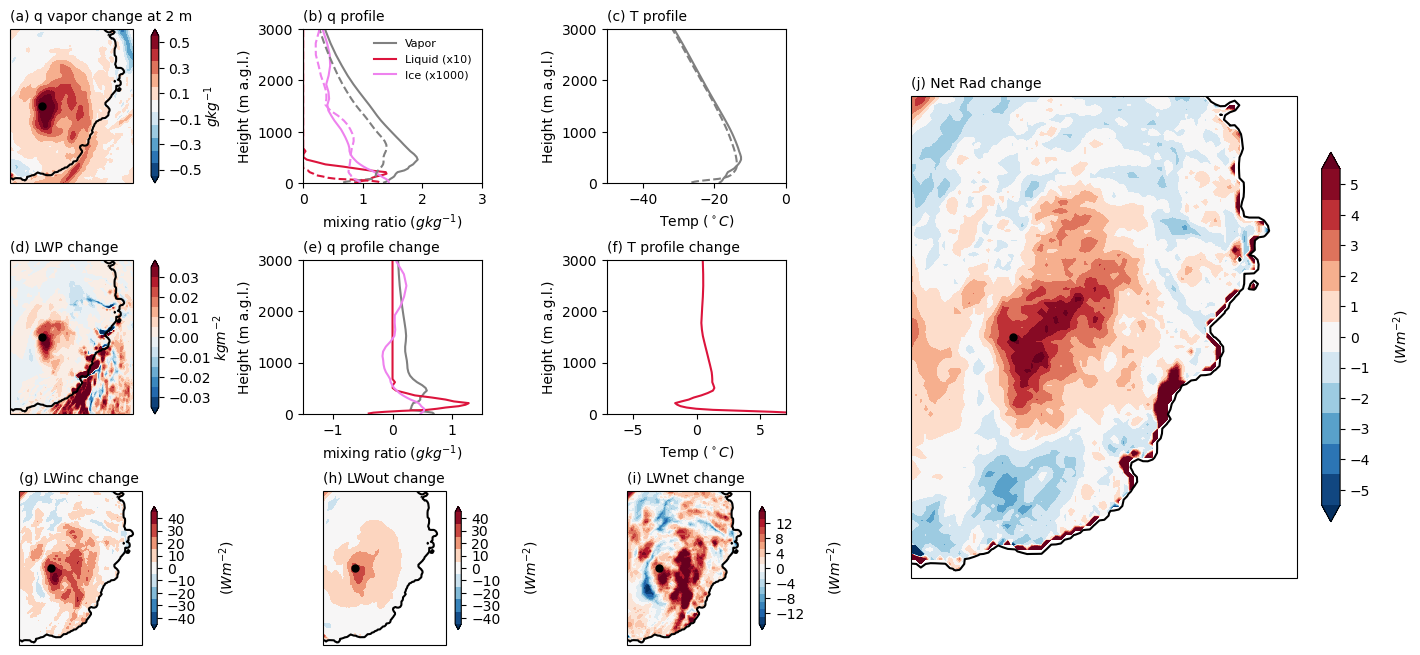

In [4]:
#############################################
# Plot terrein map
#############################################

min_height = 10
#time_ini = 39
time_ix = 0
  
####################
### Plot DRIVERS ###
#Figure and axis
fig = plt.figure(figsize=[18,8])
spec = gridspec.GridSpec(ncols=5, nrows=3, figure=fig, hspace= 0.5, wspace=0.7)

### Background
ax1 = fig.add_subplot(spec[0, 0], projection=ccrs.SouthPolarStereo())
ax2 = fig.add_subplot(spec[0, 1])
ax3 = fig.add_subplot(spec[0, 2])
ax4 = fig.add_subplot(spec[1, 0], projection=ccrs.SouthPolarStereo())
ax5 = fig.add_subplot(spec[1, 1])
ax6 = fig.add_subplot(spec[1, 2])
ax7 = fig.add_subplot(spec[2, 0], projection=ccrs.SouthPolarStereo())
ax8 = fig.add_subplot(spec[2, 1], projection=ccrs.SouthPolarStereo())
ax9 = fig.add_subplot(spec[2, 2], projection=ccrs.SouthPolarStereo())
ax10 = fig.add_subplot(spec[:, 3:], projection=ccrs.SouthPolarStereo())

################################
### Plot Water and Cloud Vapor
### Vapor Map
CS1 = ax1.contourf((wrf.to_np(qvapor_50m_hist[tini:tend,:,:].mean(axis=0)) - wrf.to_np(qvapor_50m_past[tini:tend,:,:].mean(axis=0)))*1000, np.arange(-0.55,0.56,0.1), cmap='RdBu_r', extend="both")
#CS1 = ax1.contourf((wrf.to_np(pw_ant_hist[tini:tend,:,:].mean(axis=0)) - wrf.to_np(pw_ant_past[tini:tend,:,:].mean(axis=0))), np.arange(-2,2,0.2), cmap='RdBu_r', extend="both")
cbar_1 = fig.colorbar(CS1, ax=ax1, orientation = 'vertical', pad=0.1)
cbar_1.set_label('$g kg^{-1}$', labelpad=0, fontsize=10)
cbar_1.set_ticks(np.arange(-0.5,0.6,0.2))


### Cloud Map
#CS4 = ax4.contourf((wrf.to_np(qcloud_200m_hist[tini:tend,:,:].mean(axis=0)) - wrf.to_np(qcloud_200m_past[tini:tend,:,:].mean(axis=0)))*1000, np.arange(-0.055,0.056,0.01), cmap='RdBu_r', extend="both")
CS4 = ax4.contourf((wrf.to_np(lwp_ant_hist[tini:tend,:,:].mean(axis=0)) - wrf.to_np(lwp_ant_past[tini:tend,:,:].mean(axis=0))), np.arange(-0.035,0.036,0.005), cmap='RdBu_r', extend="both")
cbar_4 = fig.colorbar(CS4, ax=ax4, orientation = 'vertical', pad=0.1)
cbar_4.set_label('$kg m^{-2}$', labelpad=0, fontsize=10)
cbar_4.set_ticks(np.arange(-0.03,0.031,0.01))


################################
### Plot Concordia Profiles
#Concordia absolute values q profile
#ax2b = ax2.twiny()
ax2.plot(wrf.to_np(qvapor_ant_hist[tini:tend,:,CON_xy[1],CON_xy[0]].mean(axis=0))*1000, Z_ant_hist_unstg[0,:,CON_xy[1],CON_xy[0]] - height[CON_xy[1],CON_xy[0]].values, c='Grey', label='Vapor')
ax2.plot(wrf.to_np(qcloud_ant_hist[tini:tend,:,CON_xy[1],CON_xy[0]].mean(axis=0))*10000, Z_ant_hist_unstg[0,:,CON_xy[1],CON_xy[0]] - height[CON_xy[1],CON_xy[0]].values, c='Crimson', label='Liquid (x10)')
ax2.plot(wrf.to_np(qice_ant_hist[tini:tend,:,CON_xy[1],CON_xy[0]].mean(axis=0))*1000000, Z_ant_hist_unstg[0,:,CON_xy[1],CON_xy[0]] - height[CON_xy[1],CON_xy[0]].values, c='Violet', label='Ice (x1000)')
ax2.plot(wrf.to_np(qvapor_ant_past[tini:tend,:,CON_xy[1],CON_xy[0]].mean(axis=0))*1000, Z_ant_hist_unstg[0,:,CON_xy[1],CON_xy[0]] - height[CON_xy[1],CON_xy[0]].values, '--', c='Grey')
ax2.plot(wrf.to_np(qcloud_ant_past[tini:tend,:,CON_xy[1],CON_xy[0]].mean(axis=0))*10000, Z_ant_hist_unstg[0,:,CON_xy[1],CON_xy[0]] - height[CON_xy[1],CON_xy[0]].values, '--', c='Crimson')
ax2.plot(wrf.to_np(qice_ant_past[tini:tend,:,CON_xy[1],CON_xy[0]].mean(axis=0))*1000000, Z_ant_hist_unstg[0,:,CON_xy[1],CON_xy[0]] - height[CON_xy[1],CON_xy[0]].values, '--', c='Violet')
ax2.legend(frameon=False, fontsize=8)

#Concordia changes q profile
#ax5b = ax5.twiny()
ax5.plot((wrf.to_np(qvapor_ant_hist[tini:tend,:,CON_xy[1],CON_xy[0]]).mean(axis=0)-wrf.to_np(qvapor_ant_past[tini:tend,:,CON_xy[1],CON_xy[0]]).mean(axis=0))*1000, Z_ant_hist_unstg[0,:,CON_xy[1],CON_xy[0]] - height[CON_xy[1],CON_xy[0]].values, c='Grey')
ax5.plot((wrf.to_np(qcloud_ant_hist[tini:tend,:,CON_xy[1],CON_xy[0]]).mean(axis=0)-wrf.to_np(qcloud_ant_past[tini:tend,:,CON_xy[1],CON_xy[0]]).mean(axis=0))*10000, Z_ant_hist_unstg[0,:,CON_xy[1],CON_xy[0]] - height[CON_xy[1],CON_xy[0]].values, c='Crimson')
ax5.plot((wrf.to_np(qice_ant_hist[tini:tend,:,CON_xy[1],CON_xy[0]]).mean(axis=0)-wrf.to_np(qice_ant_past[tini:tend,:,CON_xy[1],CON_xy[0]]).mean(axis=0))*1000000, Z_ant_hist_unstg[0,:,CON_xy[1],CON_xy[0]] - height[CON_xy[1],CON_xy[0]].values, c='Violet')

#Concordia absolute values T profile
ax3.plot(wrf.to_np(T_ant_hist[tini:tend,:,CON_xy[1],CON_xy[0]].mean(axis=0))-273.15, Z_ant_hist_unstg[0,:,CON_xy[1],CON_xy[0]] - height[CON_xy[1],CON_xy[0]].values, c='Grey', label='Temperature')
ax3.plot(wrf.to_np(T_ant_past[tini:tend,:,CON_xy[1],CON_xy[0]].mean(axis=0))-273.15, Z_ant_hist_unstg[0,:,CON_xy[1],CON_xy[0]] - height[CON_xy[1],CON_xy[0]].values, '--', c='Grey', label='Temperature preindustrial')

#Concordia absolute values T
ax6.plot(wrf.to_np(T_ant_hist[tini:tend,:,CON_xy[1],CON_xy[0]]).mean(axis=0) - wrf.to_np(T_ant_past[tini:tend,:,CON_xy[1],CON_xy[0]]).mean(axis=0), Z_ant_hist_unstg[0,:,CON_xy[1],CON_xy[0]] - height[CON_xy[1],CON_xy[0]].values, c='Crimson', label='vapour')


################################
### Plot Radiation
E_LWINC_hist_event_mean = wrf.to_np(E_LWINC_hist[tini:tend,:,:].where(height > min_height)).mean(axis=0)
E_LWOUT_hist_event_mean = wrf.to_np(-E_LWOUT_hist[tini:tend,:,:].where(height > min_height)).mean(axis=0)
E_SWINC_hist_event_mean = wrf.to_np(E_SWINC_hist[tini:tend,:,:].where(height > min_height)).mean(axis=0)
E_SWOUT_hist_event_mean = wrf.to_np(-E_SWOUT_hist[tini:tend,:,:].where(height > min_height)).mean(axis=0)
E_SENSH_hist_event_mean = wrf.to_np(E_SENSH_hist[tini:tend,:,:].where(height > min_height)).mean(axis=0)
E_LATEH_hist_event_mean = wrf.to_np(E_LATEH_hist[tini:tend,:,:].where(height > min_height)).mean(axis=0)
E_TOTAL_hist_event_mean = wrf.to_np(E_TOTAL_hist[tini:tend,:,:].where(height > min_height)).mean(axis=0)

E_LWINC_past_event_mean = wrf.to_np(E_LWINC_past[tini:tend,:,:].where(height > min_height)).mean(axis=0)
E_LWOUT_past_event_mean = wrf.to_np(-E_LWOUT_past[tini:tend,:,:].where(height > min_height)).mean(axis=0)
E_SWINC_past_event_mean = wrf.to_np(E_SWINC_past[tini:tend,:,:].where(height > min_height)).mean(axis=0)
E_SWOUT_past_event_mean = wrf.to_np(-E_SWOUT_past[tini:tend,:,:].where(height > min_height)).mean(axis=0)
E_SENSH_past_event_mean = wrf.to_np(E_SENSH_past[tini:tend,:,:].where(height > min_height)).mean(axis=0)
E_LATEH_past_event_mean = wrf.to_np(E_LATEH_past[tini:tend,:,:].where(height > min_height)).mean(axis=0)
E_TOTAL_past_event_mean = wrf.to_np(E_TOTAL_past[tini:tend,:,:].where(height > min_height)).mean(axis=0)

fill7 = ax7.contourf(E_LWINC_hist_event_mean - E_LWINC_past_event_mean, np.arange(-45,45.1,10), cmap='RdBu_r', extend="both")
fill8 = ax8.contourf(E_LWOUT_hist_event_mean - E_LWOUT_past_event_mean, np.arange(-45,45.1,10), cmap='RdBu_r', extend="both")
fill9 = ax9.contourf((E_LWINC_hist_event_mean - E_LWINC_past_event_mean) - (E_LWOUT_hist_event_mean - E_LWOUT_past_event_mean), np.arange(-15,15.1,2), cmap='RdBu_r', extend="both")
fill10= ax10.contourf(E_TOTAL_hist_event_mean - E_TOTAL_past_event_mean, np.arange(-5.5,5.6,1), cmap='RdBu_r', extend="both")

cbar7 = plt.colorbar(fill7, shrink=0.8, ax=ax7); cbar7.set_label('($Wm^{-2}$)', labelpad=15, fontsize=10); cbar7.set_ticks(np.arange(-40,40.1,10))
cbar8 = plt.colorbar(fill8, shrink=0.8, ax=ax8); cbar8.set_label('($Wm^{-2}$)', labelpad=15, fontsize=10); cbar8.set_ticks(np.arange(-40,40.1,10))
cbar9 = plt.colorbar(fill9, shrink=0.8, ax=ax9); cbar9.set_label('($Wm^{-2}$)', labelpad=15, fontsize=10); cbar9.set_ticks(np.arange(-12,12.1,4))
cbar10 = plt.colorbar(fill10, shrink=0.6, ax=ax10); cbar10.set_label('($Wm^{-2}$)', labelpad=15, fontsize=10); cbar10.set_ticks(np.arange(-5,5.1,1))

##############################
## Plot parameters profiles ##
ax2.set_ylabel('Height (m a.g.l.)', fontsize=10)
ax3.set_ylabel('Height (m a.g.l.)', fontsize=10)
ax5.set_ylabel('Height (m a.g.l.)', fontsize=10)
ax6.set_ylabel('Height (m a.g.l.)', fontsize=10)
ax2.set_xlabel('mixing ratio ($g kg^{-1}$)', fontsize=10)
#ax2b.set_xlabel('q cloud ($g kg^{-1})$)', fontsize=10)
ax5.set_xlabel('mixing ratio ($g kg^{-1}$)', fontsize=10)
#ax5b.set_xlabel('q cloud change ($g kg^{-1})$)', fontsize=10)
ax3.set_xlabel('Temp ($^\circ C$)', fontsize=10)
ax6.set_xlabel('Temp ($^\circ C$)', fontsize=10)
ax2.set_xlim(0, 3)
#ax2b.set_xlim(0, 0.3)
ax5.set_xlim(-1.5, 1.5)
#ax5b.set_xlim(-0.15, 0.15)
ax3.set_xlim(-50, 0)
ax6.set_xlim(-7, 7)

ax2.set_ylim(0, 3000)
ax3.set_ylim(0, 3000)
ax5.set_ylim(0, 3000)
ax6.set_ylim(0, 3000)


##########################
## Plot parameters maps ##
for ax in [ax1, ax4, ax7, ax8, ax9, ax10]:
    ax.contour(wrf.to_np(height), np.arange(10,9000,8000), cmap="gray", extend="both")
    ax.plot(wrf.to_np(CON_xy)[0], wrf.to_np(CON_xy)[1], 'k.', markersize=10)
    ax.set_extent([140, 220, 30, 130], crs=ccrs.SouthPolarStereo())

ax1.set_title('(a) q vapor change at 2 m', loc='left', fontsize=10)
ax2.set_title('(b) q profile', loc='left', fontsize=10)
ax3.set_title('(c) T profile', loc='left', fontsize=10)
ax4.set_title('(d) LWP change', loc='left', fontsize=10)
ax5.set_title('(e) q profile change', loc='left', fontsize=10)
ax6.set_title('(f) T profile change', loc='left', fontsize=10)
ax7.set_title('(g) LWinc change', loc='left', fontsize=10)
ax8.set_title('(h) LWout change', loc='left', fontsize=10)
ax9.set_title('(i) LWnet change', loc='left', fontsize=10)
ax10.set_title('(j) Net Rad change', loc='left', fontsize=10)


plt.savefig('Figure_2.png', dpi=300, bbox_inches = 'tight')

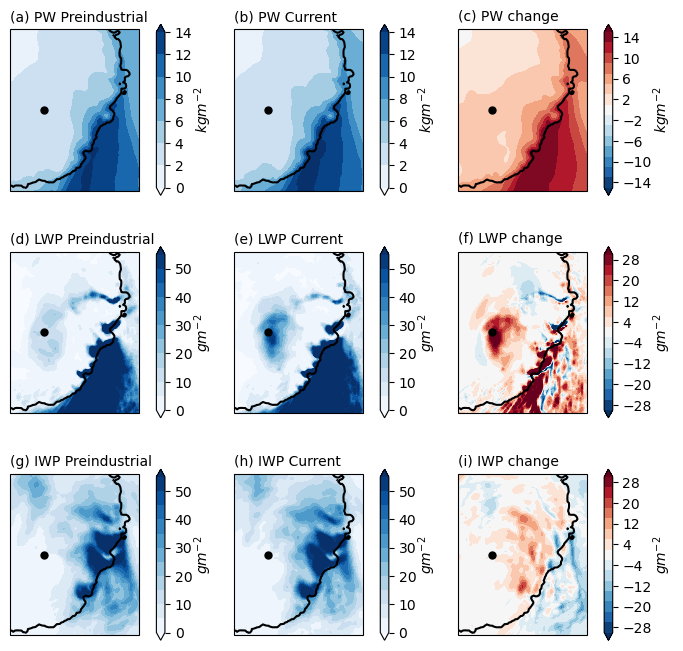

In [5]:
#############################################
# Plot terrein map
#############################################

min_height = 10
#time_ini = 39
time_ix = 0
  
####################
### Plot DRIVERS ###
#Figure and axis
fig = plt.figure(figsize=[8,8])
spec = gridspec.GridSpec(ncols=3, nrows=3, figure=fig, hspace= 0.3, wspace=0.3)

### Background
ax1 = fig.add_subplot(spec[0, 0], projection=ccrs.SouthPolarStereo())
ax2 = fig.add_subplot(spec[0, 1], projection=ccrs.SouthPolarStereo())
ax3 = fig.add_subplot(spec[0, 2], projection=ccrs.SouthPolarStereo())
ax4 = fig.add_subplot(spec[1, 0], projection=ccrs.SouthPolarStereo())
ax5 = fig.add_subplot(spec[1, 1], projection=ccrs.SouthPolarStereo())
ax6 = fig.add_subplot(spec[1, 2], projection=ccrs.SouthPolarStereo())
ax7 = fig.add_subplot(spec[2, 0], projection=ccrs.SouthPolarStereo())
ax8 = fig.add_subplot(spec[2, 1], projection=ccrs.SouthPolarStereo())
ax9 = fig.add_subplot(spec[2, 2], projection=ccrs.SouthPolarStereo())

################################
### Plot Water and Cloud Vapor
### Liquid Map Past
CS1 = ax1.contourf(wrf.to_np(pw_ant_past[tini:tend,:,:].mean(axis=0)), np.arange(0,15,2), cmap='Blues', extend="both")
cbar_1 = fig.colorbar(CS1, ax=ax1, orientation = 'vertical', pad=0.1)
cbar_1.set_label('$kg m^{-2}$', labelpad=0, fontsize=10)

### Liquid Map Hist
CS2 = ax2.contourf(wrf.to_np(pw_ant_hist[tini:tend,:,:].mean(axis=0)), np.arange(0,15,2), cmap='Blues', extend="both")
cbar_2 = fig.colorbar(CS2, ax=ax2, orientation = 'vertical', pad=0.1)
cbar_2.set_label('$kg m^{-2}$', labelpad=0, fontsize=10)

### Liquid Map Change
CS3 = ax3.contourf((wrf.to_np(pw_ant_hist[tini:tend,:,:].mean(axis=0)) - wrf.to_np(lwp_ant_past[tini:tend,:,:].mean(axis=0))), np.arange(-15,16,2), cmap='RdBu_r', extend="both")
cbar_3 = fig.colorbar(CS3, ax=ax3, orientation = 'vertical', pad=0.1)
cbar_3.set_label('$kg m^{-2}$', labelpad=0, fontsize=10)
cbar_3.set_ticks(np.arange(-14,15,4))

### Liquid Map Past
CS4 = ax4.contourf(wrf.to_np(lwp_ant_past[tini:tend,:,:].mean(axis=0))*1000, np.arange(0,60,5), cmap='Blues', extend="both")
cbar_4 = fig.colorbar(CS4, ax=ax4, orientation = 'vertical', pad=0.1)
cbar_4.set_label('$g m^{-2}$', labelpad=0, fontsize=10)

### Liquid Map Hist
CS5 = ax5.contourf(wrf.to_np(lwp_ant_hist[tini:tend,:,:].mean(axis=0))*1000, np.arange(0,60,5), cmap='Blues', extend="both")
cbar_5 = fig.colorbar(CS5, ax=ax5, orientation = 'vertical', pad=0.1)
cbar_5.set_label('$g m^{-2}$', labelpad=0, fontsize=10)

### Liquid Map Change
CS6 = ax6.contourf((wrf.to_np(lwp_ant_hist[tini:tend,:,:].mean(axis=0)) - wrf.to_np(lwp_ant_past[tini:tend,:,:].mean(axis=0)))*1000, np.arange(-30,31,4), cmap='RdBu_r', extend="both")
cbar_6 = fig.colorbar(CS6, ax=ax6, orientation = 'vertical', pad=0.1)
cbar_6.set_label('$g m^{-2}$', labelpad=0, fontsize=10)
cbar_6.set_ticks(np.arange(-28,29,8))

### Liquid Map Past
CS7 = ax7.contourf(wrf.to_np(iwp_ant_past[tini:tend,:,:].mean(axis=0))*1000, np.arange(0,60,5), cmap='Blues', extend="both")
cbar_7 = fig.colorbar(CS7, ax=ax7, orientation = 'vertical', pad=0.1)
cbar_7.set_label('$g m^{-2}$', labelpad=0, fontsize=10)

### Liquid Map Hist
CS8 = ax8.contourf(wrf.to_np(iwp_ant_hist[tini:tend,:,:].mean(axis=0))*1000, np.arange(0,60,5), cmap='Blues', extend="both")
cbar_8 = fig.colorbar(CS8, ax=ax8, orientation = 'vertical', pad=0.1)
cbar_8.set_label('$g m^{-2}$', labelpad=0, fontsize=10)

### Liquid Map Change
CS9 = ax9.contourf((wrf.to_np(iwp_ant_hist[tini:tend,:,:].mean(axis=0)) - wrf.to_np(iwp_ant_past[tini:tend,:,:].mean(axis=0)))*1000, np.arange(-30,31,4), cmap='RdBu_r', extend="both")
cbar_9 = fig.colorbar(CS9, ax=ax9, orientation = 'vertical', pad=0.1)
cbar_9.set_label('$g m^{-2}$', labelpad=0, fontsize=10)
cbar_9.set_ticks(np.arange(-28,29,8))


##########################
## Plot parameters maps ##
for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]:
    ax.contour(wrf.to_np(height), np.arange(10,9000,8000), cmap="gray", extend="both")
    ax.plot(wrf.to_np(CON_xy)[0], wrf.to_np(CON_xy)[1], 'k.', markersize=10)
    ax.set_extent([140, 220, 30, 130], crs=ccrs.SouthPolarStereo())

ax1.set_title('(a) PW Preindustrial', loc='left', fontsize=10)
ax2.set_title('(b) PW Current', loc='left', fontsize=10)
ax3.set_title('(c) PW change', loc='left', fontsize=10)
ax4.set_title('(d) LWP Preindustrial', loc='left', fontsize=10)
ax5.set_title('(e) LWP Current', loc='left', fontsize=10)
ax6.set_title('(f) LWP change', loc='left', fontsize=10)
ax7.set_title('(g) IWP Preindustrial', loc='left', fontsize=10)
ax8.set_title('(h) IWP Current', loc='left', fontsize=10)
ax9.set_title('(i) IWP change', loc='left', fontsize=10)

plt.savefig('Figure_3.png', dpi=300, bbox_inches = 'tight')